In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#function to read csv or excel file
def read_file(file_name):
    if file_name.endswith('.csv'):
        return pd.read_csv(file_name)
    elif file_name.endswith('.xlsx'):
        return pd.read_excel(file_name)
    else:
        print('File format not supported')
        return None

In [3]:
#total missing data function
def nun_missing_values(df):
    total_missing = df.isnull().sum()
    total_missing = total_missing[total_missing > 0]
    total_missing.sort_values(inplace=True)
    return total_missing

In [4]:
#returning the dataframe with the nun columns dropped
def drop_columns_50_percent_missing(df):
    nun_columns = df.isnull().sum()
    nun_columns = nun_columns[nun_columns > len(df) * 0.5]
    nun_columns.sort_values(inplace=True)
    df.drop(nun_columns.index, axis=1, inplace=True)
    print('\nDropped columns with more than 50% missing values: {}'.format(nun_columns.sum()))
    return df

In [5]:
def bool_to_datetime(df):
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
    elif 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
    return df

In [6]:
#extract year from the date column
def extract_year(df):
    if 'Date' in df.columns:
        df['year'] = df['Date'].dt.year
    elif 'date' in df.columns:
        df['year'] = df['date'].dt.year
    return df['year']

In [7]:
#extract month from the date column
def extract_month(df):
    if 'Date' in df.columns:
        df['month'] = df['Date'].dt.month
    elif 'date' in df.columns:
        df['month'] = df['date'].dt.month
    return df['month']

In [8]:
#spliting year into quarters by month and adding quarter column
def split_month_into_quarters(df):
    df['quarter'] = df['month'].apply(lambda x: 1 if x <= 3 else (2 if x <= 6 else (3 if x <= 9 else 4)))
    return df['quarter']


In [9]:
#function for extracting the numerical features
def numeric_features(df):
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    return numeric_features

In [10]:
#function for extracting the categorical features
def categorical_features(df):
    categorical_features = df.select_dtypes(include=['object', 'bool', 'category']).columns
    return categorical_features

In [11]:
#function for dropping id column
def drop_id(df):
    if 'id' in df.columns:
        df.drop('id', axis=1, inplace=True)
    elif 'ID' in df.columns:
        df.drop('ID', axis=1, inplace=True)
    return df

In [12]:
#function to get information about the data
def df_info(df):
    print('Dataframe info:')
    print(df.info())
    print('\n')
    print('Dataframe describe:')
    print(df.describe())

In [13]:
data = '../input/data-police-shootings/fatal-police-shootings-data.csv'
df = read_file(data)

In [14]:
df_info(df)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(

In [15]:
#converting the date column to datetime
bool_to_datetime(df)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [16]:
#extracting year from the date column and adding it to the dataframe
df['year'] = extract_year(df)
df['year'] = df.year.astype('category')

In [17]:
#extracting month from the date column and adding it to the dataframe
df['month'] = extract_month(df)
df['month'] = df.month.astype('category')

In [18]:
#adding quarter column to the dataframe
df['quarter'] = split_month_into_quarters(df)
df['quarter'] = df.quarter.astype('category')

In [19]:
df = drop_id(df)

In [20]:
#deinializing race column
df.replace(to_replace = ['A'], value = ['Asian'], inplace = True)
df.replace(to_replace = ['B'], value = ['Black Non-Hispanic'], inplace = True)
df.replace(to_replace = ['H'], value = ['Hispanic'], inplace = True)
df.replace(to_replace = ['N'], value = ['Native American'], inplace = True)
df.replace(to_replace = ['O'], value = ['Other'], inplace = True)
df.replace(to_replace = ['W'], value = ['White Non-Hispanic'], inplace = True)

In [21]:
df_info(df)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     5416 non-null   object        
 1   date                     5416 non-null   datetime64[ns]
 2   manner_of_death          5416 non-null   object        
 3   armed                    5189 non-null   object        
 4   age                      5181 non-null   float64       
 5   gender                   5414 non-null   object        
 6   race                     4895 non-null   object        
 7   city                     5416 non-null   object        
 8   state                    5416 non-null   object        
 9   signs_of_mental_illness  5416 non-null   bool          
 10  threat_level             5416 non-null   object        
 11  flee                     5167 non-null   object        
 12  body_camera       

In [22]:
nun_missing_values(df)

gender      2
armed     227
age       235
flee      249
race      521
dtype: int64

In [23]:
#dropping columns with more than 50% missing values
drop_columns_50_percent_missing(df)


Dropped columns with more than 50% missing values: 0


,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,quarter
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,2015,1,1
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White Non-Hispanic,Aloha,OR,False,attack,Not fleeing,False,2015,1,1
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,2015,1,1
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White Non-Hispanic,San Francisco,CA,True,attack,Not fleeing,False,2015,1,1
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,William Slyter,2020-06-13,shot,gun,22.0,M,White Non-Hispanic,Kansas City,MO,False,other,Other,False,2020,6,2
5412,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,2020,6,2
5413,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,White Non-Hispanic,Lawrence,KS,False,attack,Car,False,2020,6,2
5414,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,2020,6,2


In [24]:
#getting the numeric features
numeric_features = numeric_features(df)

#getting the categorical features
categorical_features = categorical_features(df)

<AxesSubplot:>

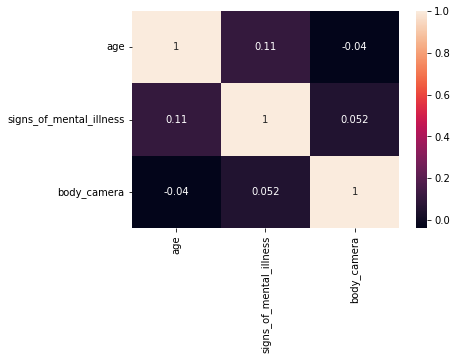

In [25]:
#dataframe correlation
corr = df.corr()
sns.heatmap(corr, annot=True)

In [26]:
#getting distribution of numeric features
for col_name in numeric_features:
    col = df[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


age:
 - Range: 85.00
 - Variance: 172.03
 - Std.Dev: 13.12


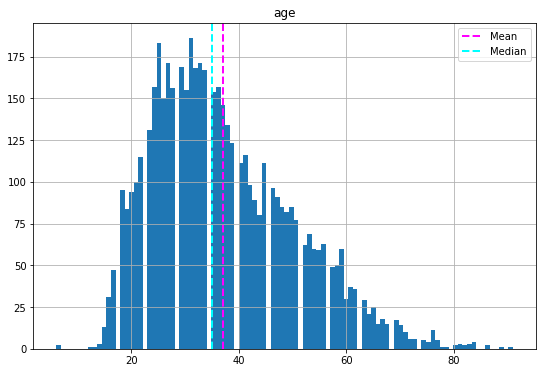

In [27]:
#getting distribution of numeric features with plots

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')
    ax.set_title(col)
    plt.legend()
plt.show()



Statistical analysis of name:
TK TK                       187
Michael Johnson               3
Michael Ferguson              2
Timothy Leroy Harrington      2
Robert Edwards                2
                           ... 
Kheyanev Littledog            1
Maurico Barron                1
Dennis Hunt                   1
Luis Michael Hoff             1
Nicholas Hirsh                1
Name: name, Length: 5206, dtype: int64


Descriptive statistics of name:
count      5416
unique     5206
top       TK TK
freq        187
Name: name, dtype: object


Histogram of name:


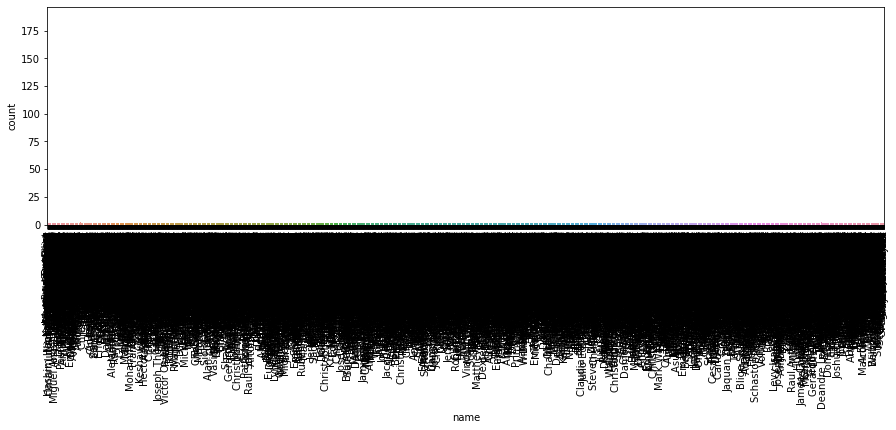



Statistical analysis of manner_of_death:
shot                5146
shot and Tasered     270
Name: manner_of_death, dtype: int64


Descriptive statistics of manner_of_death:
count     5416
unique       2
top       shot
freq      5146
Name: manner_of_death, dtype: object


Histogram of manner_of_death:


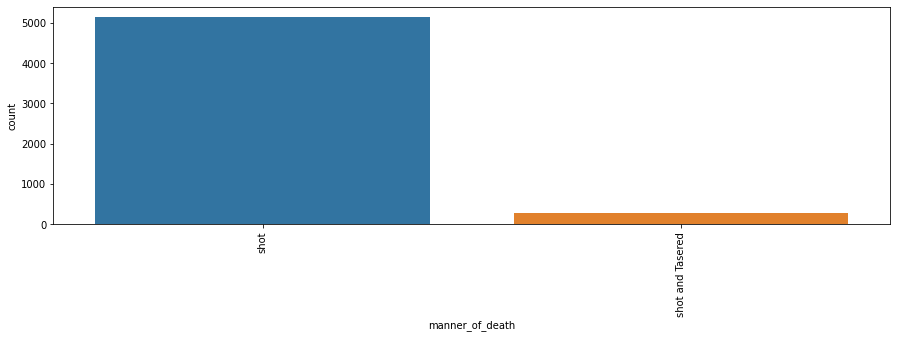



Statistical analysis of armed:
gun                        3060
knife                       792
unarmed                     353
toy weapon                  186
undetermined                164
                           ... 
baseball bat and bottle       1
fireworks                     1
pen                           1
chainsaw                      1
car, knife and mace           1
Name: armed, Length: 93, dtype: int64


Descriptive statistics of armed:
count     5189
unique      93
top        gun
freq      3060
Name: armed, dtype: object


Histogram of armed:


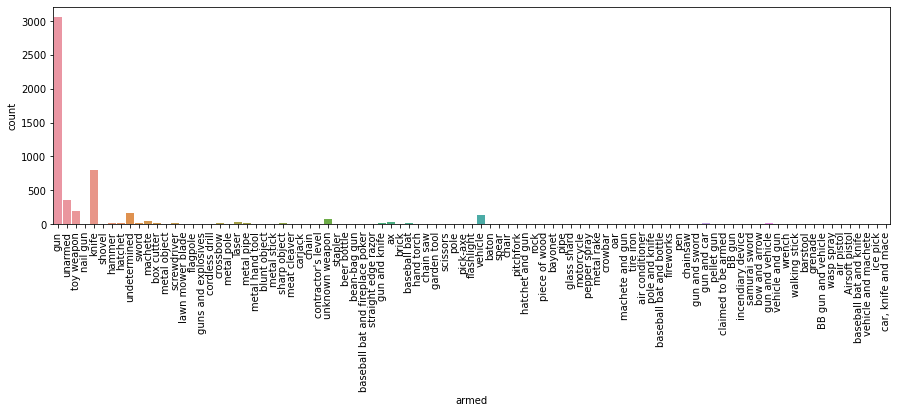



Statistical analysis of gender:
M    5176
F     238
Name: gender, dtype: int64


Descriptive statistics of gender:
count     5414
unique       2
top          M
freq      5176
Name: gender, dtype: object


Histogram of gender:


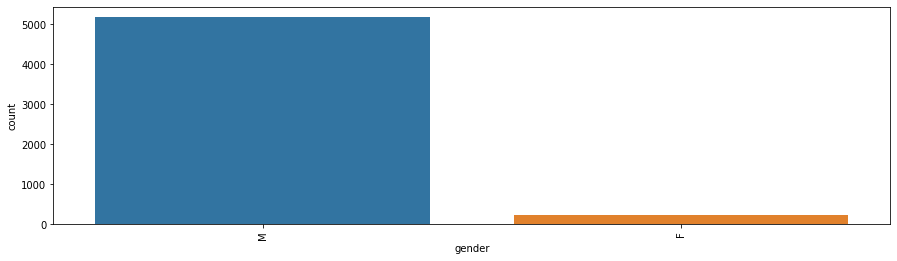



Statistical analysis of race:
White Non-Hispanic    2476
Black Non-Hispanic    1298
Hispanic               902
Asian                   93
Native American         78
Other                   48
Name: race, dtype: int64


Descriptive statistics of race:
count                   4895
unique                     6
top       White Non-Hispanic
freq                    2476
Name: race, dtype: object


Histogram of race:


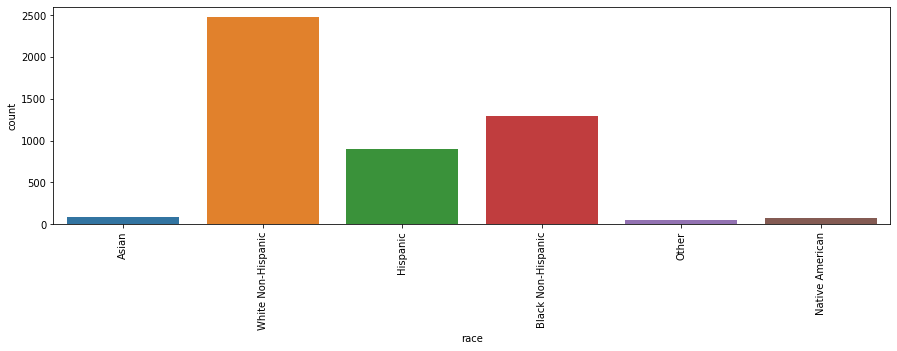



Statistical analysis of city:
Los Angeles          85
Phoenix              78
Houston              57
Las Vegas            45
San Antonio          43
                     ..
Huntingdon County     1
Loxahatchee           1
Chestertown           1
Campbellton           1
Beach Park            1
Name: city, Length: 2470, dtype: int64


Descriptive statistics of city:
count            5416
unique           2470
top       Los Angeles
freq               85
Name: city, dtype: object


Histogram of city:


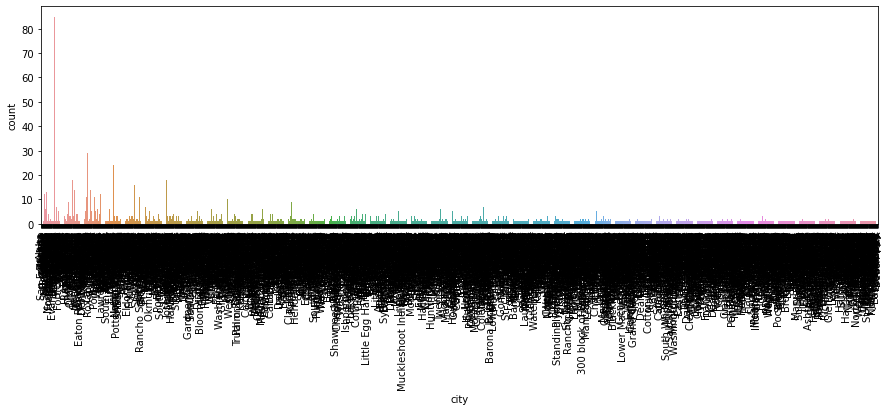



Statistical analysis of state:
CA    799
TX    481
FL    350
AZ    254
CO    195
GA    182
OK    164
NC    156
OH    155
WA    152
MO    141
TN    139
LA    109
PA    108
NM    106
IL    104
AL    104
NY    101
NV     96
KY     95
IN     95
VA     95
WI     91
OR     88
SC     88
AR     83
MD     79
MI     78
NJ     68
MS     65
MN     61
UT     60
WV     54
KS     50
ID     42
AK     39
MA     35
IA     32
MT     31
HI     30
NE     24
ME     22
CT     21
SD     17
WY     14
NH     13
DC     13
DE     13
ND     11
VT      9
RI      4
Name: state, dtype: int64


Descriptive statistics of state:
count     5416
unique      51
top         CA
freq       799
Name: state, dtype: object


Histogram of state:


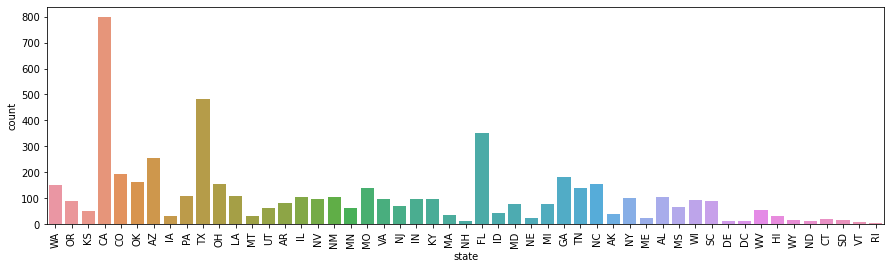



Statistical analysis of signs_of_mental_illness:
False    4200
True     1216
Name: signs_of_mental_illness, dtype: int64


Descriptive statistics of signs_of_mental_illness:
count      5416
unique        2
top       False
freq       4200
Name: signs_of_mental_illness, dtype: object


Histogram of signs_of_mental_illness:


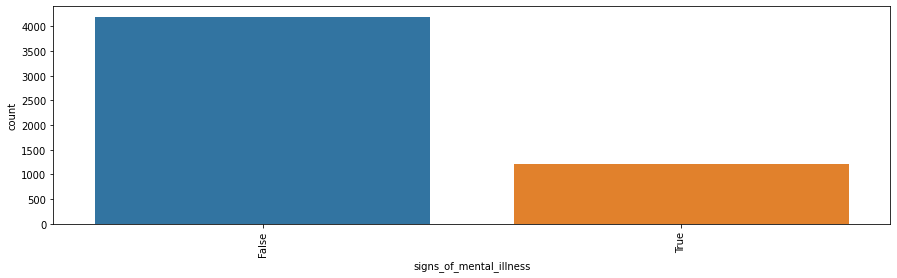



Statistical analysis of threat_level:
attack          3495
other           1682
undetermined     239
Name: threat_level, dtype: int64


Descriptive statistics of threat_level:
count       5416
unique         3
top       attack
freq        3495
Name: threat_level, dtype: object


Histogram of threat_level:


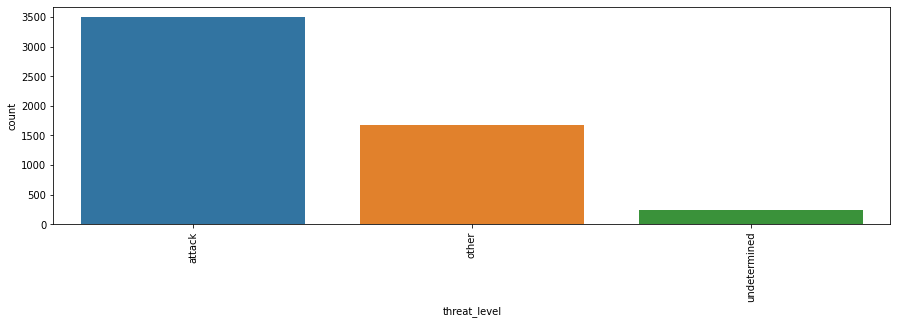



Statistical analysis of flee:
Not fleeing    3411
Car             900
Foot            692
Other           164
Name: flee, dtype: int64


Descriptive statistics of flee:
count            5167
unique              4
top       Not fleeing
freq             3411
Name: flee, dtype: object


Histogram of flee:


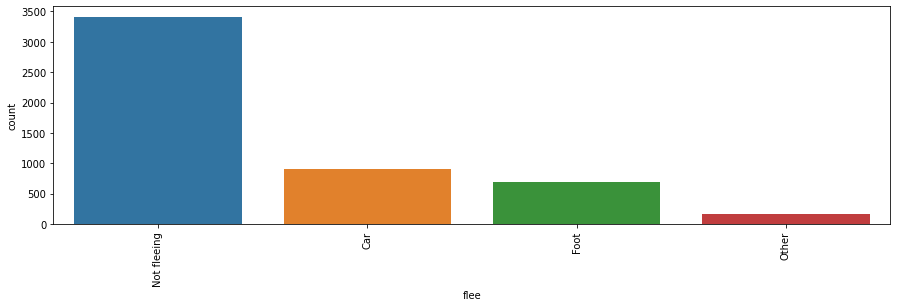



Statistical analysis of body_camera:
False    4798
True      618
Name: body_camera, dtype: int64


Descriptive statistics of body_camera:
count      5416
unique        2
top       False
freq       4798
Name: body_camera, dtype: object


Histogram of body_camera:


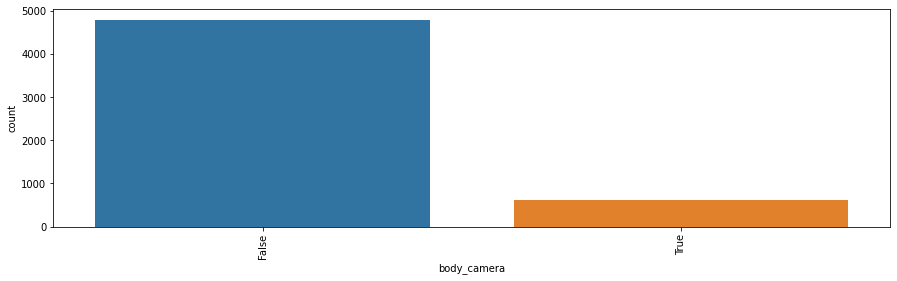



Statistical analysis of year:
2019    1002
2015     994
2018     991
2017     986
2016     962
2020     481
Name: year, dtype: int64


Descriptive statistics of year:
count     5416
unique       6
top       2019
freq      1002
Name: year, dtype: int64


Histogram of year:


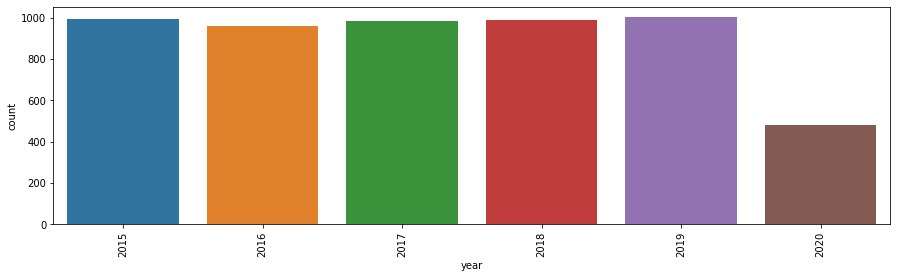



Statistical analysis of month:
3     551
1     531
2     495
5     486
4     470
6     439
7     439
12    421
8     418
10    411
11    392
9     363
Name: month, dtype: int64


Descriptive statistics of month:
count     5416
unique      12
top          3
freq       551
Name: month, dtype: int64


Histogram of month:


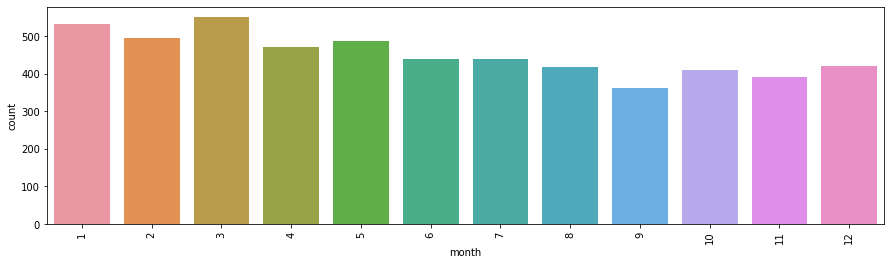



Statistical analysis of quarter:
1    1577
2    1395
4    1224
3    1220
Name: quarter, dtype: int64


Descriptive statistics of quarter:
count     5416
unique       4
top          1
freq      1577
Name: quarter, dtype: int64


Histogram of quarter:


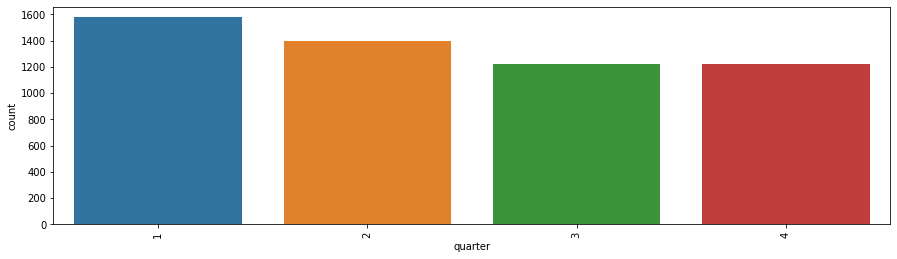

In [28]:
#statistical analysis of categorical features
for feature in categorical_features:
    print('\n')
    print('Statistical analysis of {}:'.format(feature))
    print(df[feature].value_counts())
    print('\n')
    print('Descriptive statistics of {}:'.format(feature))
    print(df[feature].describe())
    print('\n')
    print('Histogram of {}:'.format(feature))
    plt.figure(figsize=(15,4))
    sns.countplot(x=feature, data=df)
    plt.xticks(rotation=90)
    plt.show()

In [29]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title(var_data.name + ' Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

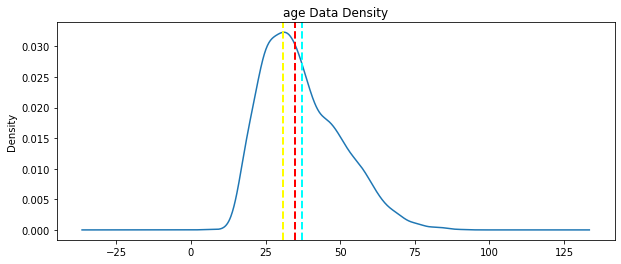

In [30]:

# Get the density of numeric features
for col in numeric_features:
    show_density(df[col])

In [31]:
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(var_data.name +'\n'+'Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Distribution of ' + var_data.name)

    # Show the figure
    fig.show()


age
Minimum:6.00
Mean:37.12
Median:35.00
Mode:31.00
Maximum:91.00



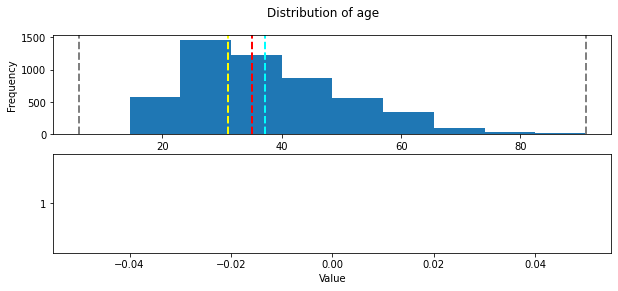

In [32]:
for col in numeric_features:
    show_distribution(df[col])

In [33]:
#bivariate data exploration
def plot_bivariate (arr_1, arr_2, df, kind):
    '''
    This function will plot a bivariate graph and display it
    arr_1: first array
    arr_2: second array
    df: dataframe
    kind: kind of plot
    '''
    for col_1 in arr_1:
        for col_2 in arr_2:
            sns.catplot(x=col_1, y=col_2, data=df, kind=kind, height=5, aspect=3)
            plt.xticks(rotation=90)
            plt.show();


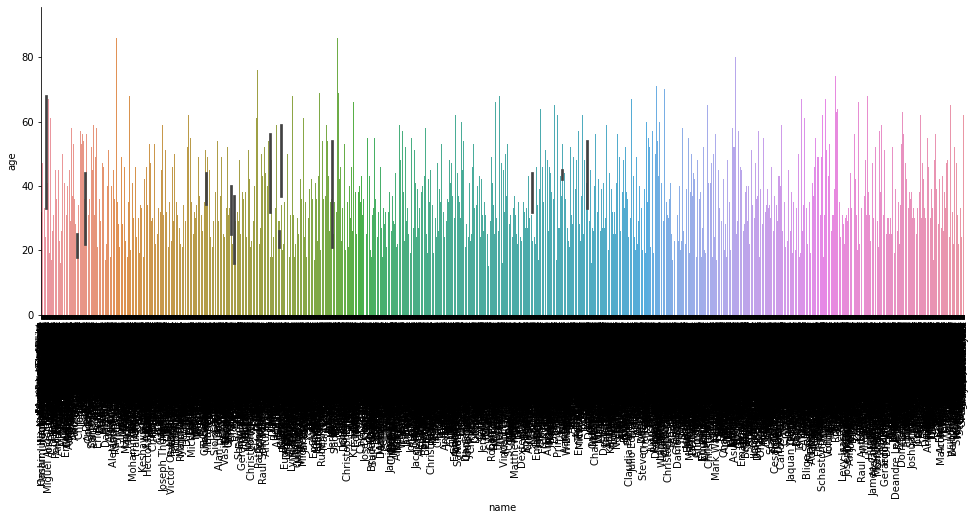

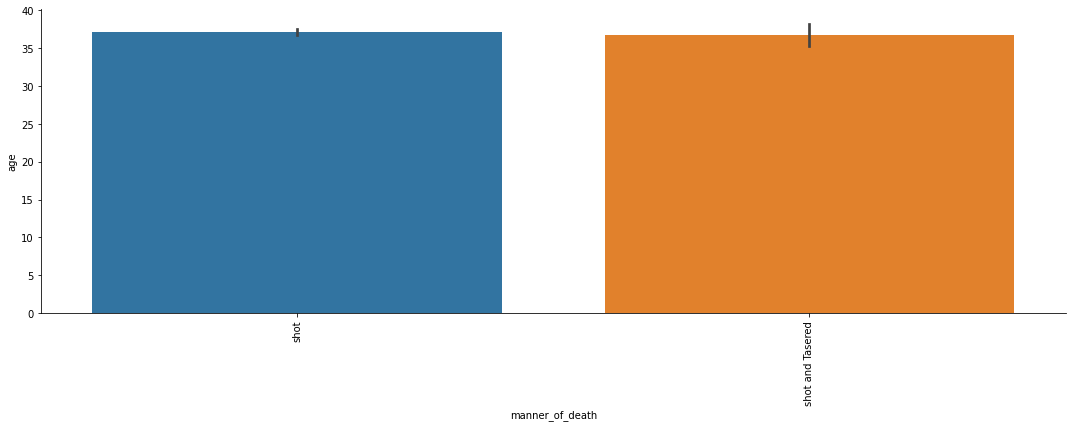

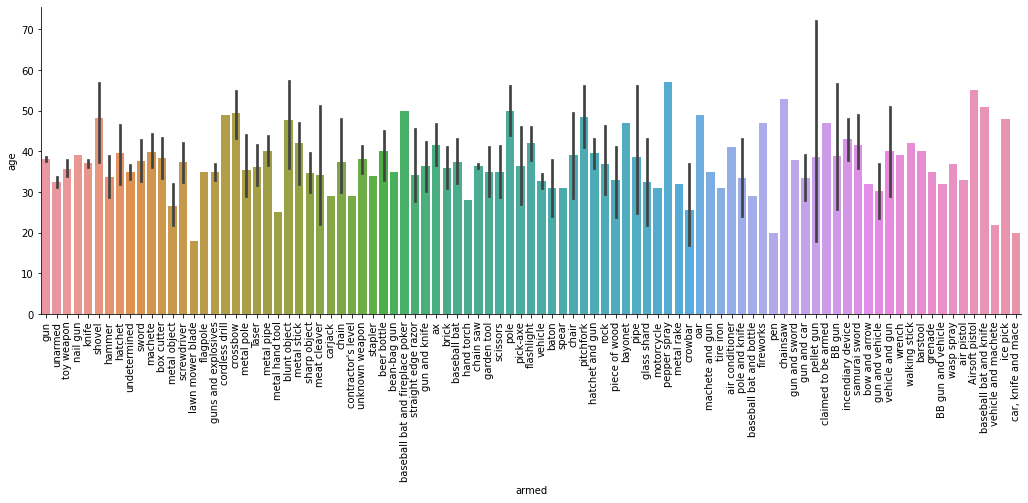

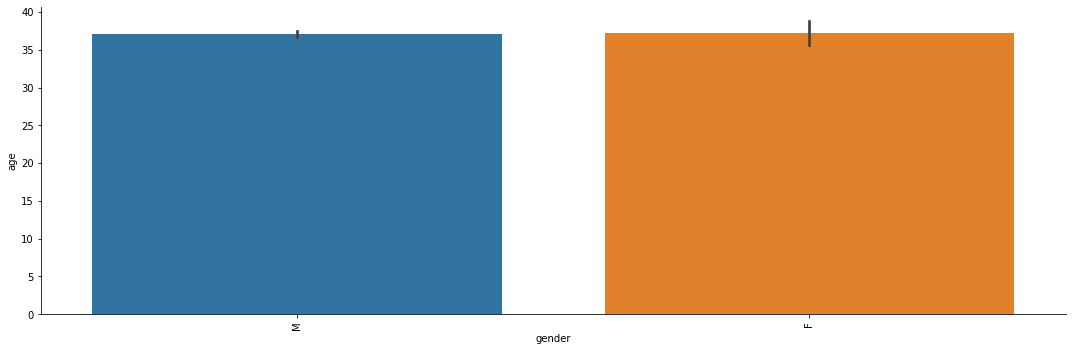

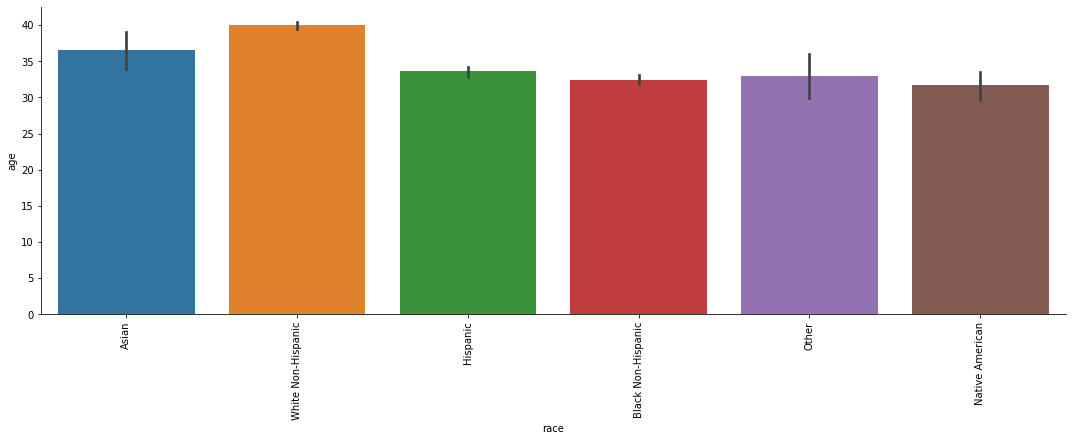

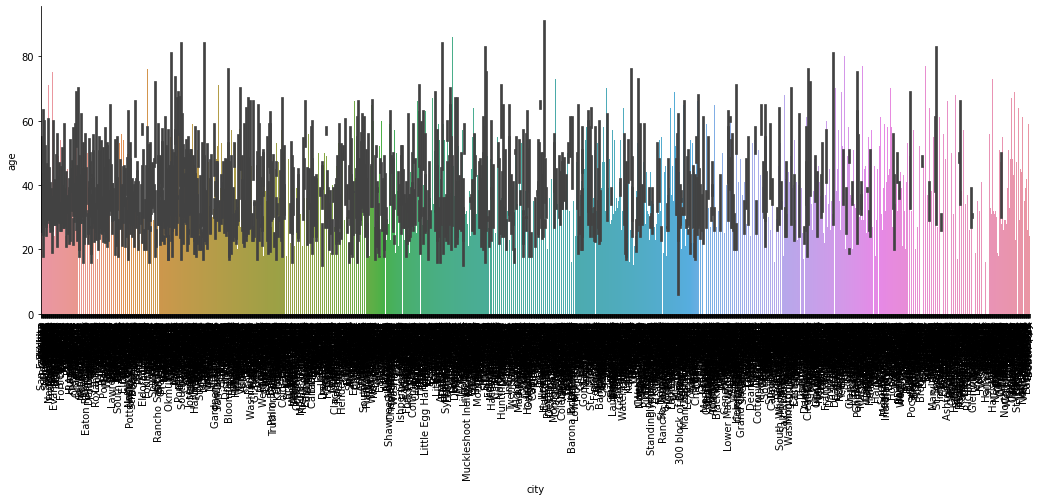

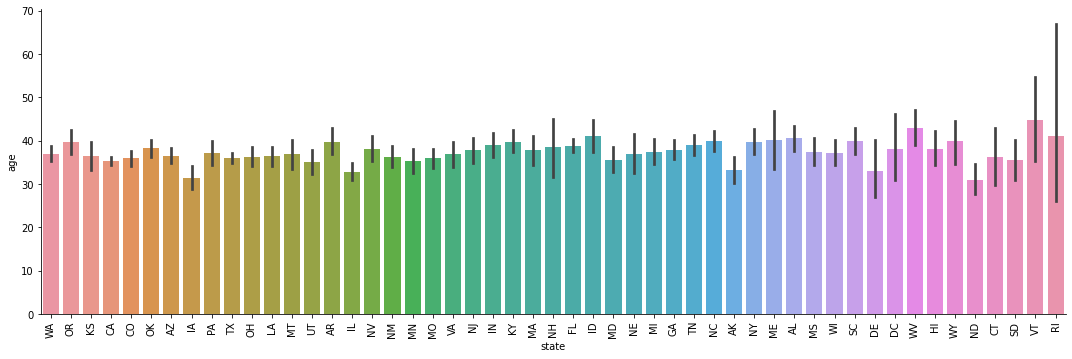

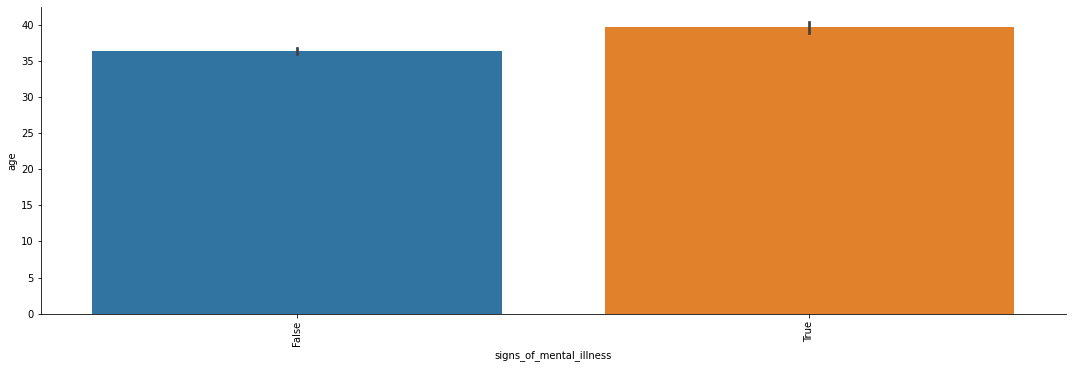

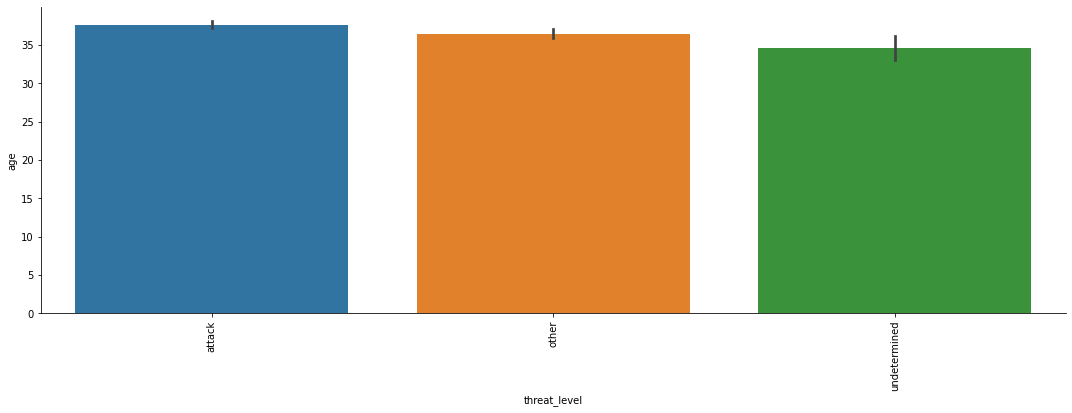

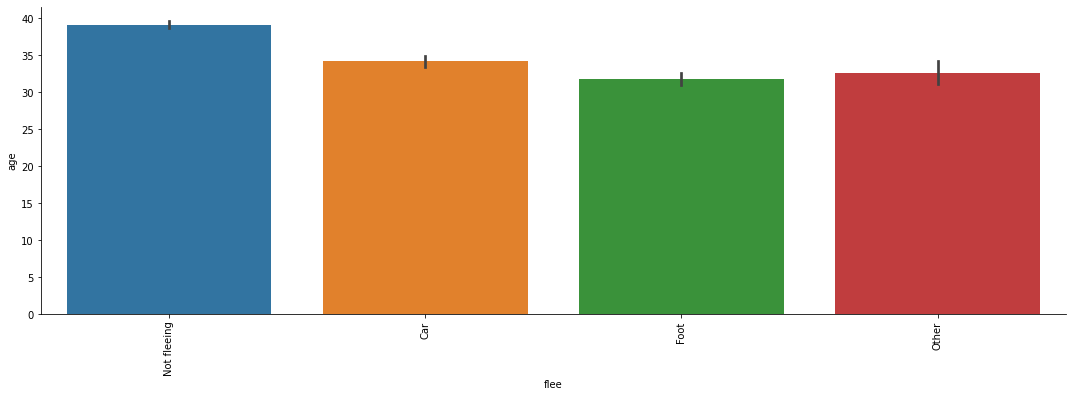

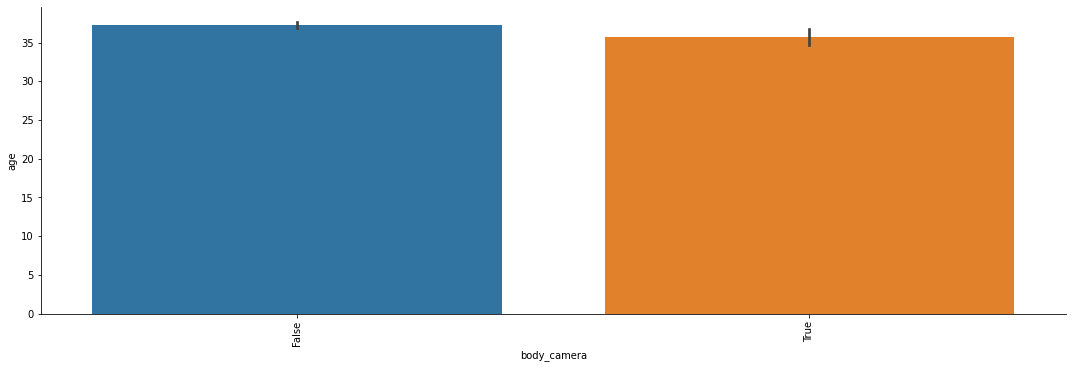

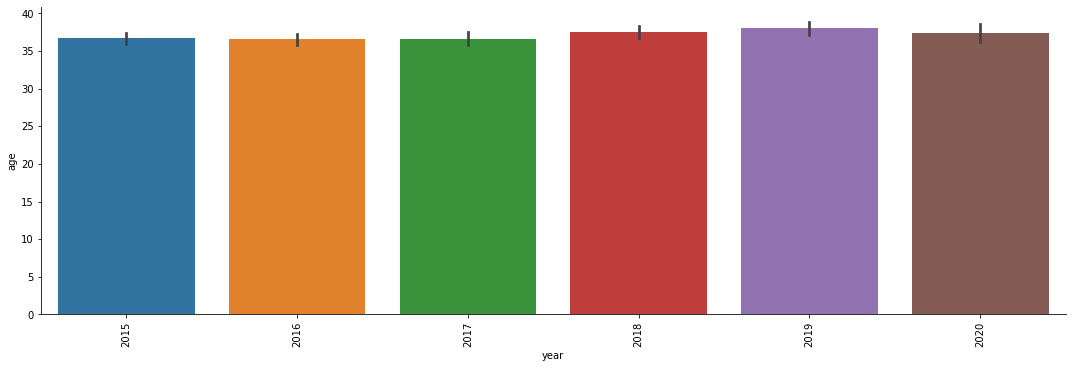

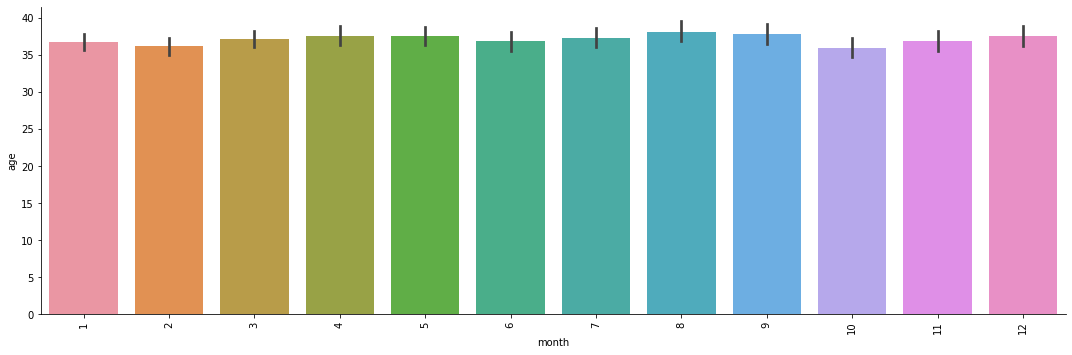

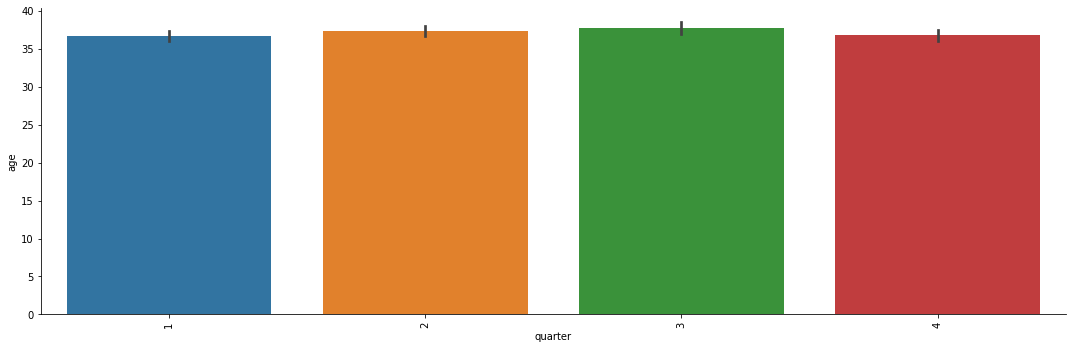

In [34]:
plot_bivariate (categorical_features, numeric_features, df, 'bar')

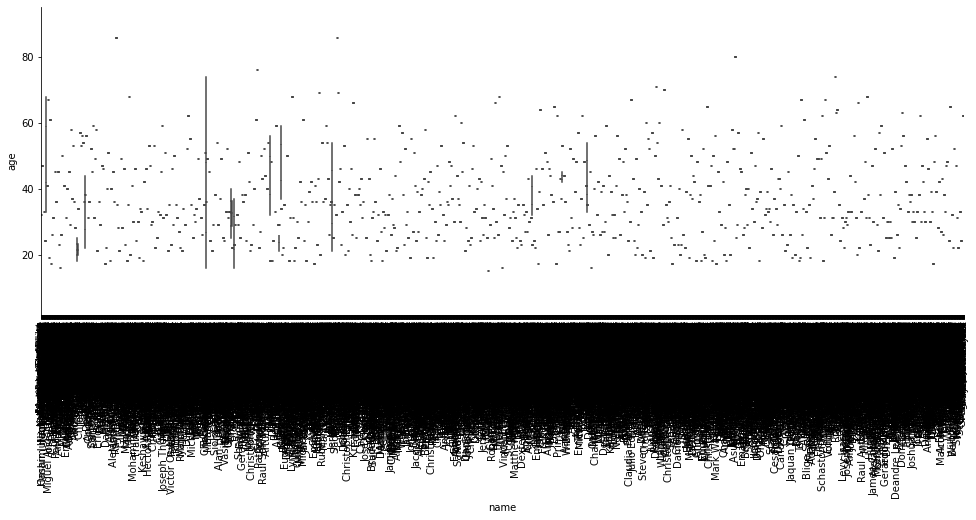

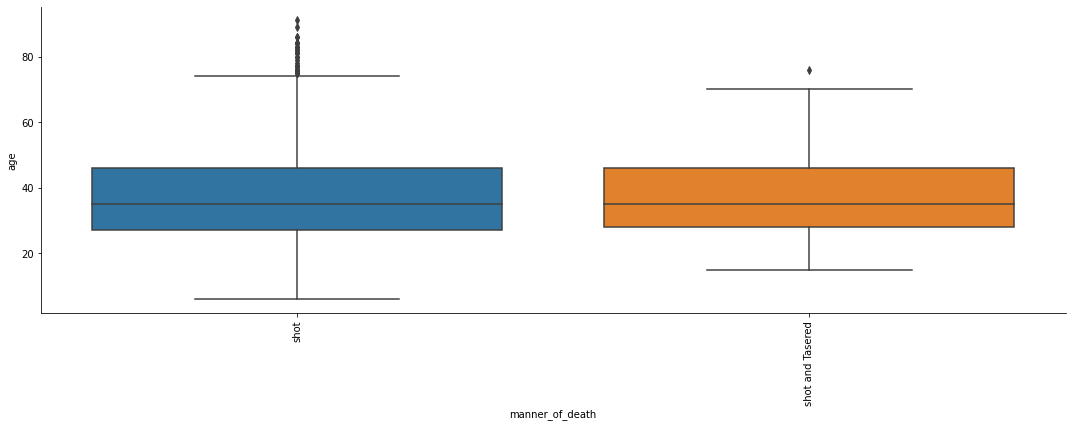

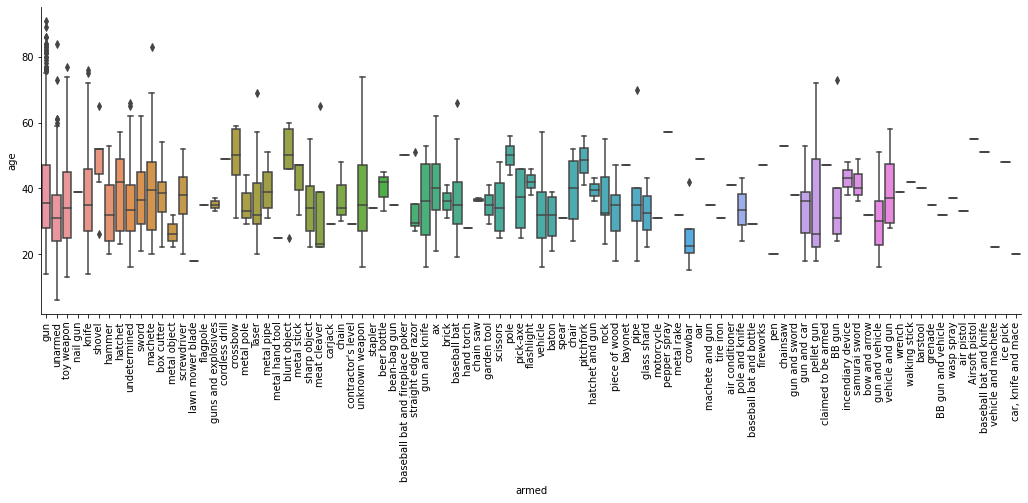

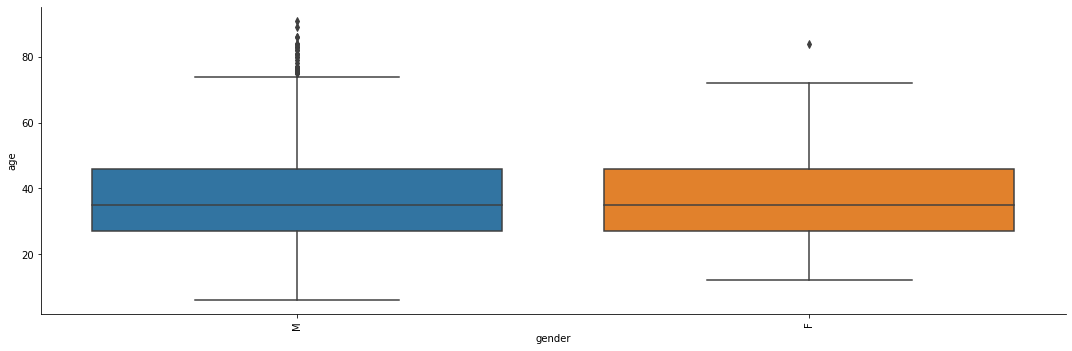

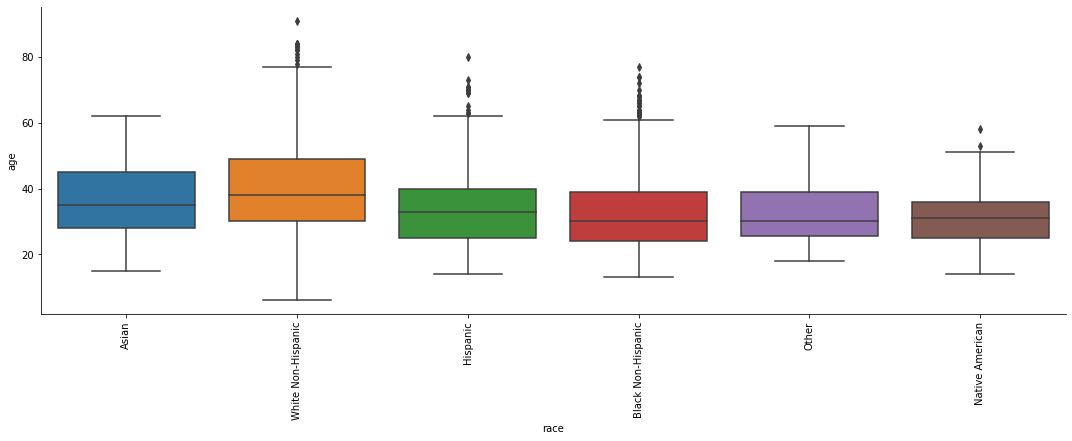

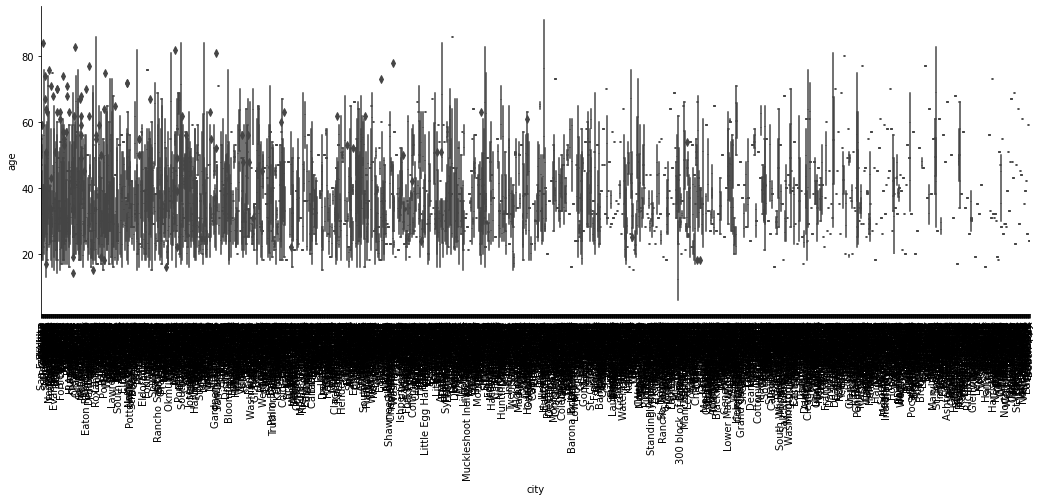

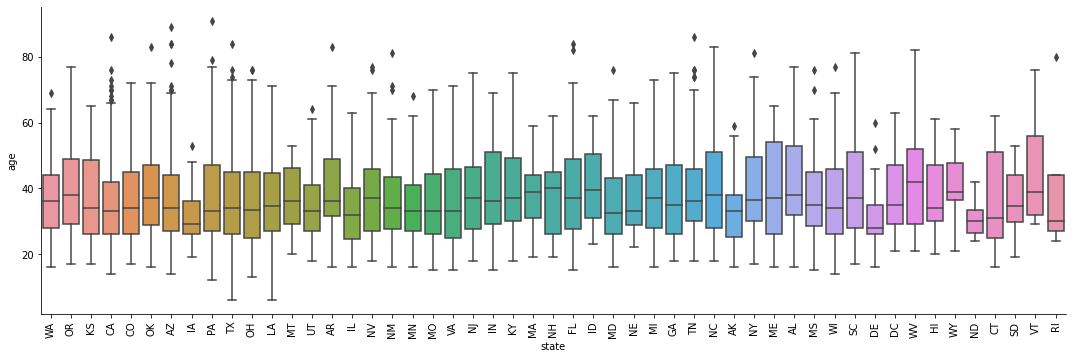

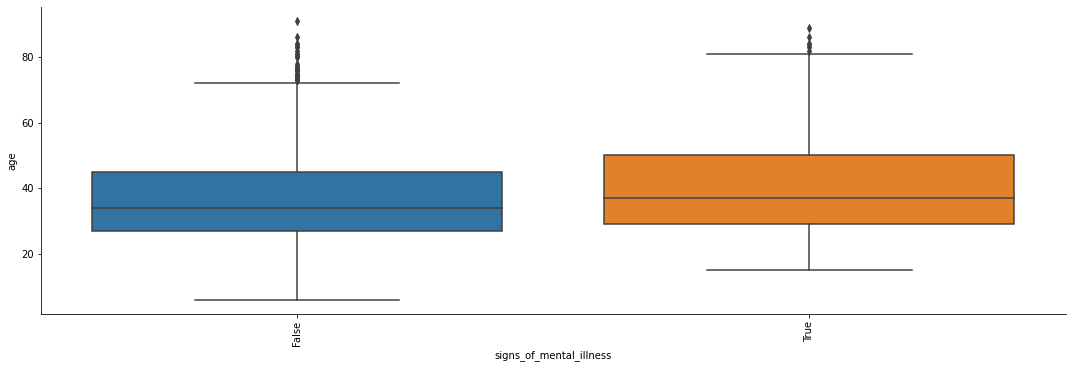

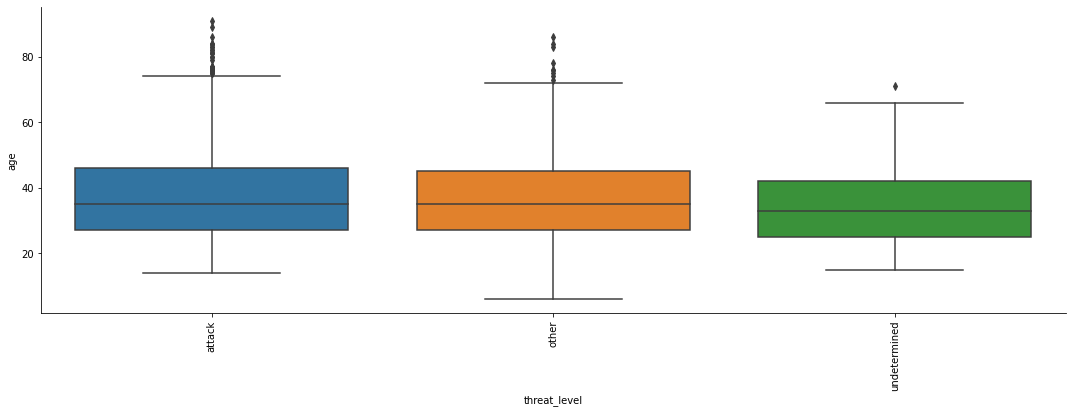

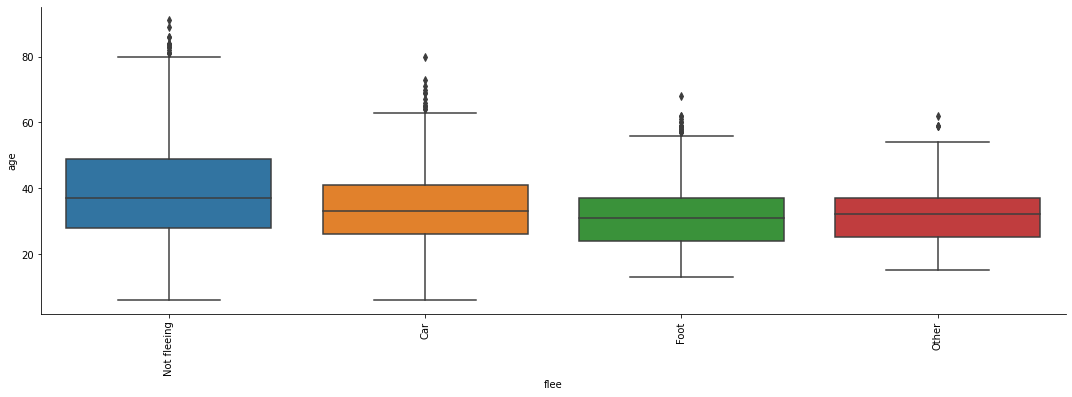

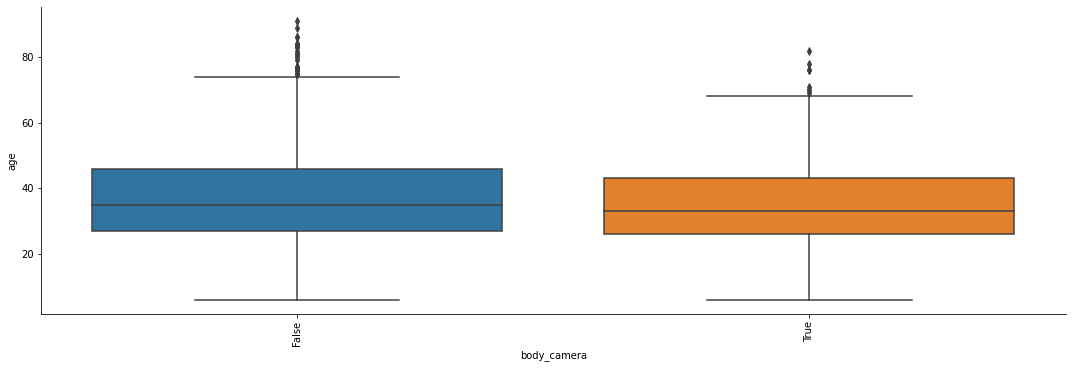

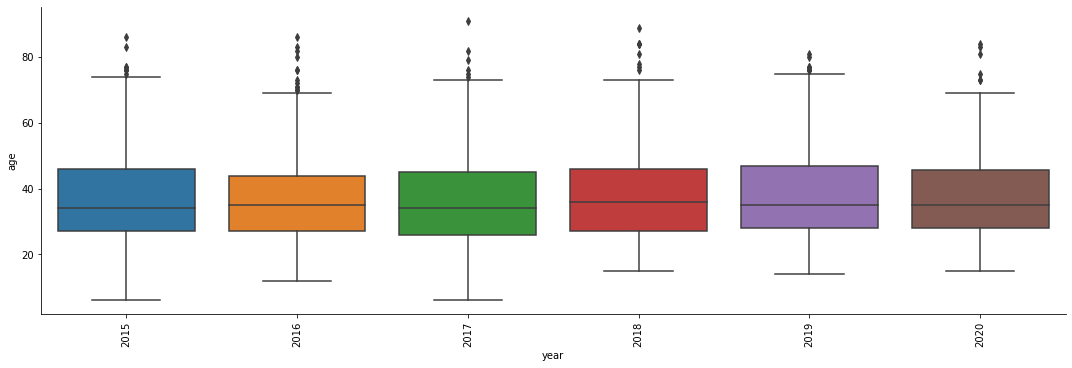

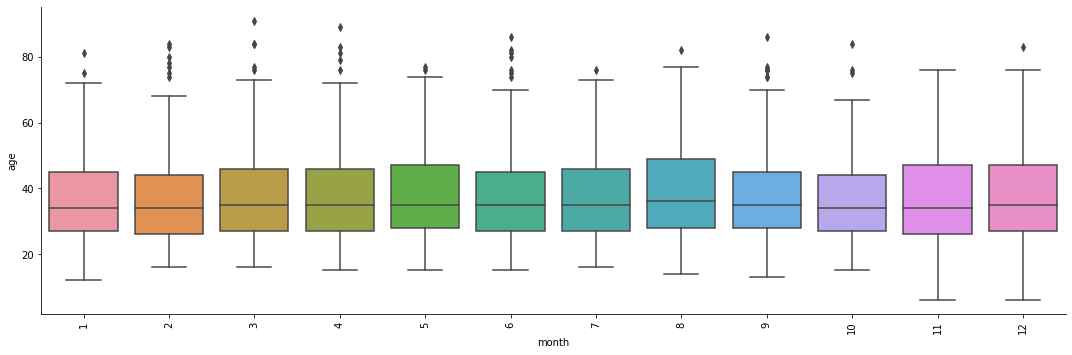

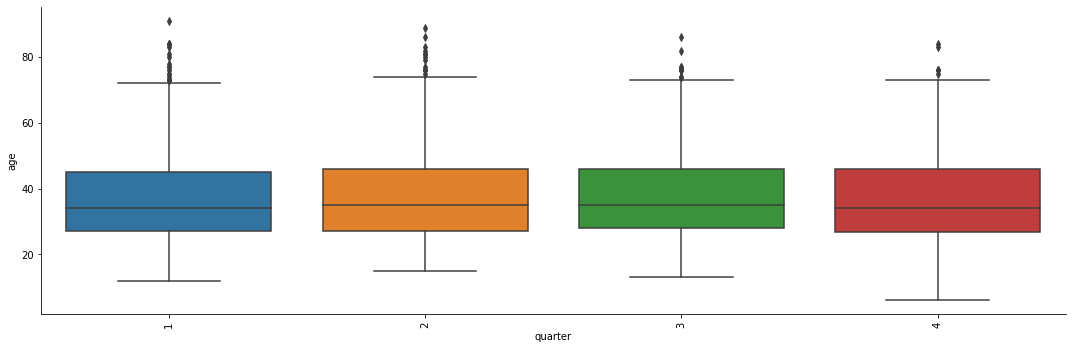

In [35]:
plot_bivariate (categorical_features, numeric_features, df, 'box')